In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
# Load the dataset from CSV file
projectPath_save = projectPath_save = "./save/"
projectPath = "./data/"
file_path = projectPath+ "timeVideo4.csv"

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df

,TIME,behaviour
0,00:00:00,NaN
1,00:00:15,NaN
2,00:00:30,NaN
3,00:00:45,NaN
4,00:01:00,NaN
...,...,...
1323,05:30:45,LF
1324,05:31:00,LF
1325,05:31:15,LF
1326,05:31:30,LF


**Remove sequences of same behaviour**

In [ ]:
df['behaviour_next'] = df['behaviour'].shift(-1)
df = df[df['behaviour'] != df['behaviour_next']]
df = df.drop('behaviour_next', axis=1)

In [ ]:
#Remove NaN
df = df[df['behaviour'].notna()]

In [ ]:
print(df)

          TIME behaviour
13    00:03:15       FAN
23    00:05:45        LF
34    00:08:30       FAN
38    00:09:30        LF
50    00:12:30      BEND
...        ...       ...
1303  05:25:45  NIP_CORE
1312  05:28:00      INSF
1321  05:30:15       FAN
1326  05:31:30        LF
1327  05:31:45       MAF

[127 rows x 2 columns]


In [ ]:
# Calculate transitions
transitions = list(zip(df['behaviour'], df['behaviour'].shift(-1)))
transitions = [t for t in transitions if pd.notnull(t[1])]

In [ ]:
transitions

[('FAN', 'LF'),
 ('LF', 'FAN'),
 ('FAN', 'LF'),
 ('LF', 'BEND'),
 ('BEND', 'DAN_CIRC'),
 ('DAN_CIRC', 'BEND'),
 ('BEND', 'DAN_CIRC'),
 ('DAN_CIRC', 'DAN_CIRC'),
 ('DAN_CIRC', 'BEND'),
 ('BEND', 'LF'),
 ('LF', 'CHASE_FLEE'),
 ('CHASE_FLEE', 'BN'),
 ('BN', 'INS'),
 ('INS', 'FAN'),
 ('FAN', 'NIP_CORE'),
 ('NIP_CORE', 'LF'),
 ('LF', 'BEND'),
 ('BEND', 'DAN_CIRC'),
 ('DAN_CIRC', 'BK_SW'),
 ('BK_SW', 'BEND'),
 ('BEND', 'INSF'),
 ('INSF', 'FAN'),
 ('FAN', 'NIP_IN'),
 ('NIP_IN', 'NIP_CORE'),
 ('NIP_CORE', 'INSF'),
 ('INSF', 'NIP_CORE'),
 ('NIP_CORE', 'INSF'),
 ('INSF', 'ROLL'),
 ('ROLL', 'BK_SW'),
 ('BK_SW', 'ROLL'),
 ('ROLL', 'FAN'),
 ('FAN', 'LF'),
 ('LF', 'NIP_CORE'),
 ('NIP_CORE', 'INS'),
 ('INS', 'MAN'),
 ('MAN', 'NIP_IN'),
 ('NIP_IN', 'NIP_IN'),
 ('NIP_IN', 'NIP_CORE'),
 ('NIP_CORE', 'BK_SW'),
 ('BK_SW', 'ROLL'),
 ('ROLL', 'ROLL'),
 ('ROLL', 'FAN'),
 ('FAN', 'ROLL'),
 ('ROLL', 'FAN'),
 ('FAN', 'MAN'),
 ('MAN', 'FAN'),
 ('FAN', 'NIP_IN'),
 ('NIP_IN', 'ROLL'),
 ('ROLL', 'LF'),
 ('LF', 'MAF

In [ ]:
# Find all unique behaviours
unique_behaviors = df['behaviour'].unique()
print(unique_behaviors)
print(len(unique_behaviors))

['FAN' 'LF' 'BEND' 'DAN_CIRC' 'CHASE_FLEE' 'BN' 'INS' 'NIP_CORE' 'BK_SW'
 'INSF' 'NIP_IN' 'ROLL' 'MAN' 'MAF' 'GB' 'SPA' 'AM']
17


In [ ]:
# Initialize transition matrix
transition_matrix = pd.DataFrame(0, index=unique_behaviors, columns=unique_behaviors)

In [ ]:
# Fill transition matrix
for (current_behavior, next_behavior) in transitions:
    transition_matrix.loc[current_behavior, next_behavior] += 1



In [ ]:
transition_matrix

,FAN,LF,BEND,DAN_CIRC,CHASE_FLEE,BN,INS,NIP_CORE,BK_SW,INSF,NIP_IN,ROLL,MAN,MAF,GB,SPA,AM
FAN,0,8,0,0,0,0,0,2,0,0,2,2,1,0,0,0,0
LF,4,0,2,0,1,0,0,1,1,0,0,0,0,3,0,0,0
BEND,0,1,0,10,0,0,0,0,1,1,0,1,0,0,5,0,0
DAN_CIRC,0,0,9,1,0,0,0,0,1,0,0,1,0,0,0,0,0
CHASE_FLEE,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
BN,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
INS,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
NIP_CORE,1,2,0,0,0,0,1,0,1,3,0,2,0,0,0,0,1
BK_SW,0,0,2,0,0,1,0,0,0,0,0,2,0,0,0,0,0
INSF,2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
# Normalize matrix to get probabilities
transition_matrix_normalized = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

In [ ]:
transition_matrix_normalized

,FAN,LF,BEND,DAN_CIRC,CHASE_FLEE,BN,INS,NIP_CORE,BK_SW,INSF,NIP_IN,ROLL,MAN,MAF,GB,SPA,AM
FAN,0.000000,0.533333,0.000000,0.000000,0.000000,0.0,0.000000,0.133333,0.000000,0.000000,0.133333,0.133333,0.066667,0.000000,0.000000,0.000000,0.000000
LF,0.333333,0.000000,0.166667,0.000000,0.083333,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000
BEND,0.000000,0.052632,0.000000,0.526316,0.000000,0.0,0.000000,0.000000,0.052632,0.052632,0.000000,0.052632,0.000000,0.000000,0.263158,0.000000,0.000000
DAN_CIRC,0.000000,0.000000,0.750000,0.083333,0.000000,0.0,0.000000,0.000000,0.083333,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000
CHASE_FLEE,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BN,0.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.250000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
INS,0.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
NIP_CORE,0.090909,0.181818,0.000000,0.000000,0.000000,0.0,0.090909,0.000000,0.090909,0.272727,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,0.090909
BK_SW,0.000000,0.000000,0.400000,0.000000,0.000000,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000
INSF,0.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000


**Visualize transition matrix for all behaviours**

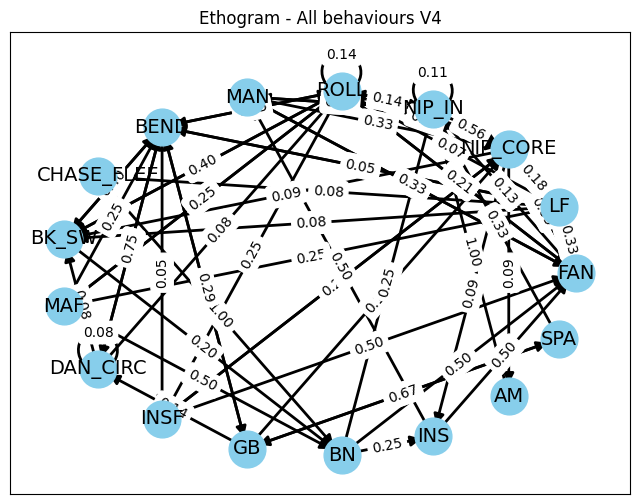

In [ ]:
# Create graph
G = nx.DiGraph()

# Add nodes and arches with weights
for i in range(len(transition_matrix_normalized)):
    for j in range(len(transition_matrix_normalized.columns)):
        if transition_matrix_normalized.iloc[i, j] > 0:
            G.add_edge(transition_matrix_normalized.index[i],
                       transition_matrix_normalized.columns[j],
                       weight=transition_matrix_normalized.iloc[i, j])

# Define layout
pos = nx.circular_layout(G)
plt.figure(figsize=(8, 6))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')

# Draw arches
nx.draw_networkx_edges(G, pos, width=2, arrowstyle='-|>', arrowsize=15)

# Draw labels at nodes
nx.draw_networkx_labels(G, pos, font_size=14, font_family='sans-serif')

# Draw labels at arches
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Ethogram - All behaviours V4')
#Save image
#plt.savefig(projectPath_save + 'EthogramV4.png
plt.show()


**select behaviours of interest**

In [ ]:
# Define the behaviors of interest for ethogram and Markov chain
behaviors_of_interest = ['BEND', 'DAN_CIRC', 'GB', 'SPA']

**Filter normalized matrix**

In [ ]:
# Filter normalized matrix for behaviour of interest
filtered_transition_matrix_normalizedBI = transition_matrix_normalized.loc[behaviors_of_interest, behaviors_of_interest]

print(filtered_transition_matrix_normalizedBI)


              BEND  DAN_CIRC        GB       SPA
BEND      0.000000  0.526316  0.263158  0.000000
DAN_CIRC  0.750000  0.083333  0.000000  0.000000
GB        0.285714  0.142857  0.000000  0.428571
SPA       0.000000  0.000000  0.666667  0.000000


**Slightly different visualizations to choose from**

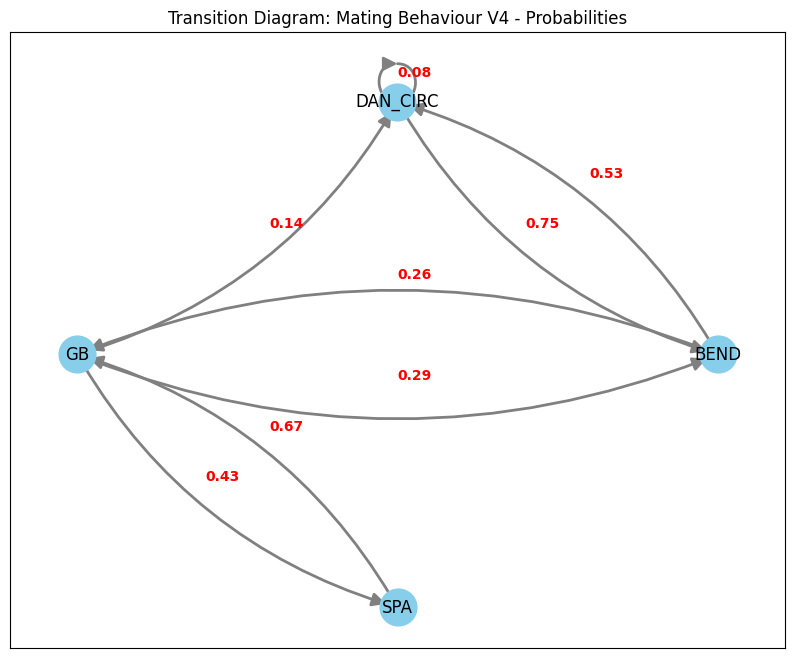

In [ ]:
# Graph
G_filtered = nx.DiGraph()


for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # add arch with weight (transition probability)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Position circular nodes
pos_filtered = nx.circular_layout(G_filtered)

plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Draw curving arches and arrow points
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modify position to draw curving arches
    rad = 0.2 if u != v else 0.0  # rad=0.2 for curve, rad=0 for self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Add labels to nodes
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Add labels to arches with probability
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    # Calculate mean position between strating and ending nodes
    x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2
    y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2 +0.1
    # Apply shift to avoid overlapping
    offset = 0.1
    x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
    y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Title
plt.title('Transition Diagram: Mating Behaviour V4 - Probabilities')

#Save image
#plt.savefig(projectPath_save + '01MatingBehaviourV4.png')
#plt.savefig(projectPath_save + '01MatingBehaviourV4.pdf')
#plt.savefig(projectPath_save + '01MatingBehaviourV4.svg')


plt.show()


<ipython-input-21-cfd72af98c8a>:29: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],


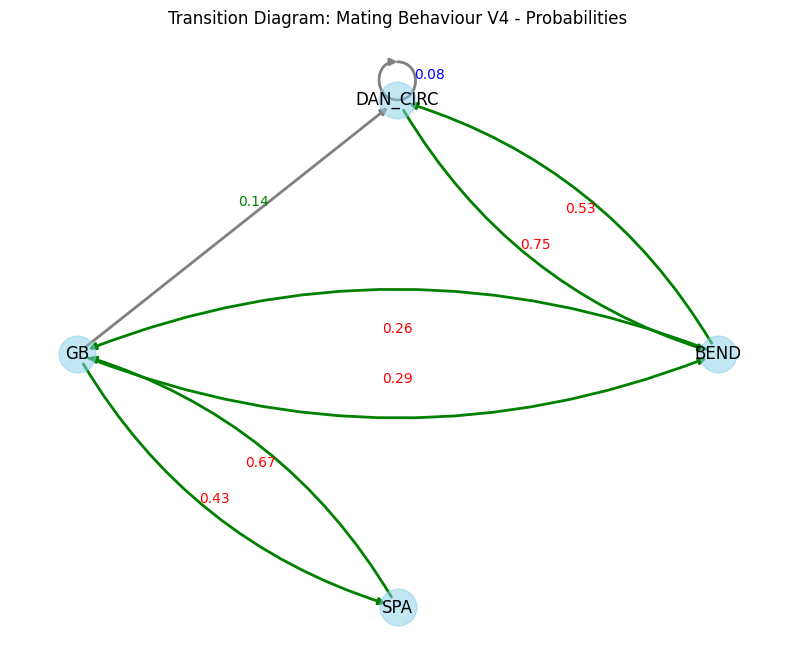

In [ ]:
# Create graph
G_filtered = nx.DiGraph()


for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:

            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)


pos = nx.circular_layout(G_filtered)

plt.figure(figsize=(10, 8))


nx.draw_networkx_nodes(G_filtered, pos, node_size=700, node_color='skyblue', alpha=0.5)


for u, v, d in G_filtered.edges(data=True):
    if G_filtered.has_edge(v, u) and u != v:

        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='green',
                               connectionstyle='arc3,rad=0.2')  # Arco curvo

        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],
                               width=2, arrows=False, edge_color='white',    #toglie la linea in mezzo
                               connectionstyle='arc3,rad=-0.2')  # Arco curvo opposto senza punta di freccia
    else:

        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='gray')


nx.draw_networkx_labels(G_filtered, pos, font_size=12, font_color='black', font_family='sans-serif')

# Label arches
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G_filtered.edges(data=True)}

# Label arches
for (u, v), label in edge_labels.items():
    if u == v:  # Check for self-loop
        x, y = pos[u]
        plt.text(x + 0.1, y + 0.1, label, color='blue', ha='center', va='center')
    else:
        if G_filtered.has_edge(v, u) and u != v:  # Check for two-direction arches
            # label for bending arch u -> v
            x, y = (pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2
            dx, dy = pos[v][0] - pos[u][0], pos[v][1] - pos[u][1]
            angle = np.arctan2(dy, dx)
            angle = np.degrees(angle)
            plt.text(x + 0.1 * np.sin(np.radians(angle)), y - 0.1 * np.cos(np.radians(angle)),
                     label, color='red', ha='center', va='center')
        else:
            # label for one-direction arch
            plt.text((pos[u][0] + pos[v][0] + 0.1) / 2 + 0.1 * np.sin(np.radians(angle)), (pos[u][1] + pos[v][1]) / 2 +0.1 * np.cos(np.radians(angle)),
                     label, color='green', ha='center', va='center')


plt.title('Transition Diagram: Mating Behaviour V4 - Probabilities')
plt.axis('off')  # Deactivate axis

#Save image
#plt.savefig(projectPath_save + '02MatingBehaviourV4.png')
#plt.savefig(projectPath_save + '02MatingBehaviourV4.pdf')
#plt.savefig(projectPath_save + '02MatingBehaviourV4.svg')


plt.show()



**Grouping behaviours for categories**

**COURTSHIP**

In [ ]:
#Removing "['BK_SW', 'H_UP', 'BEND_OPP', 'H_DOWN', 'UP'] not in index"
Courtship_all = ['BEND', 'DAN_CIRC', 'ROLL', 'GB', 'LF',  'MAF', 'INSF']
Courtship_last = ['BEND', 'DAN_CIRC', 'GB', 'SPA']  #same as mating behaviour


In [ ]:
# Filter matrix on behaviours of interest
filtered_transition_matrix_normalizedBI = transition_matrix_normalized.loc[Courtship_all, Courtship_all]

print(filtered_transition_matrix_normalizedBI)


              BEND  DAN_CIRC      ROLL        GB        LF       MAF      INSF
BEND      0.000000  0.526316  0.052632  0.263158  0.052632  0.000000  0.052632
DAN_CIRC  0.750000  0.083333  0.083333  0.000000  0.000000  0.000000  0.000000
ROLL      0.214286  0.000000  0.142857  0.000000  0.071429  0.142857  0.000000
GB        0.285714  0.142857  0.000000  0.000000  0.000000  0.000000  0.000000
LF        0.166667  0.000000  0.000000  0.000000  0.000000  0.250000  0.000000
MAF       0.250000  0.000000  0.250000  0.000000  0.000000  0.000000  0.000000
INSF      0.000000  0.000000  0.250000  0.000000  0.000000  0.000000  0.000000


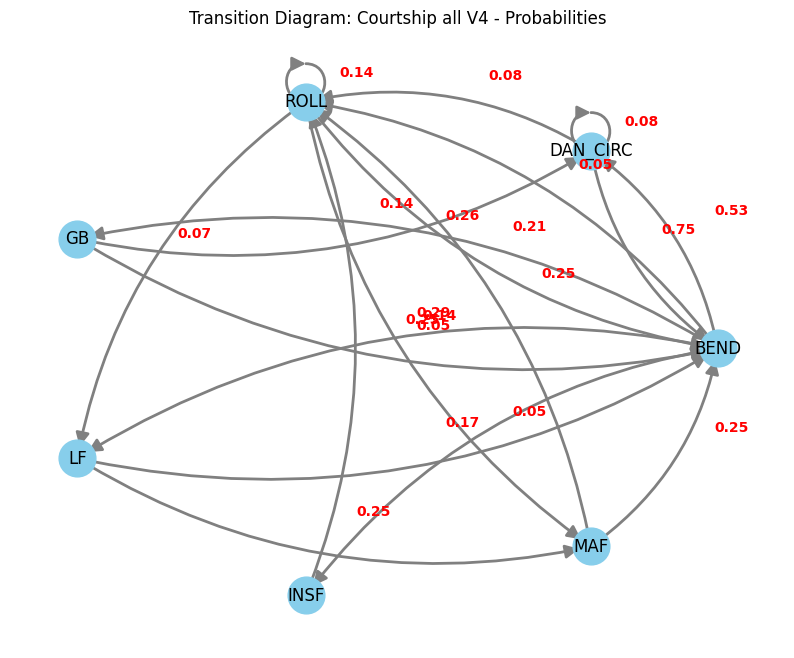

In [ ]:
# Graph
G_filtered = nx.DiGraph()

# Aggiunta degli archi al grafo con le probabilità come peso
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
pos_filtered = nx.circular_layout(G_filtered)

# Creazione del grafico
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Disegna archi con stile a curve e frecce monodirezionali
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modifica la posizione per disegnare archi curvi
    rad = 0.2 if u != v else 0.0  # rad=0.2 per curve, rad=0 per self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Aggiunta delle etichette ai nodi
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Aggiunta delle etichette agli archi con la probabilità di transizione vicino agli archi
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    # Calcola la posizione media tra i nodi di partenza e di arrivo
    x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2 +0.1
    y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2 +0.1
    # Applica un piccolo spostamento per evitare sovrapposizioni con le frecce
    offset = 0.1
    x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
    y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Titolo del grafico
plt.title('Transition Diagram: Courtship all V4 - Probabilities')
plt.axis('off')  # Disattiva gli assi

#Save image
#plt.savefig(projectPath_save + '01Courtship_allV4.png')
#plt.savefig(projectPath_save + '01Courtship_allV4.pdf')
#plt.savefig(projectPath_save + '01Courtship_allV4.svg')

# Mostra il grafico
plt.show()


<ipython-input-25-1d083610ad40>:29: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],


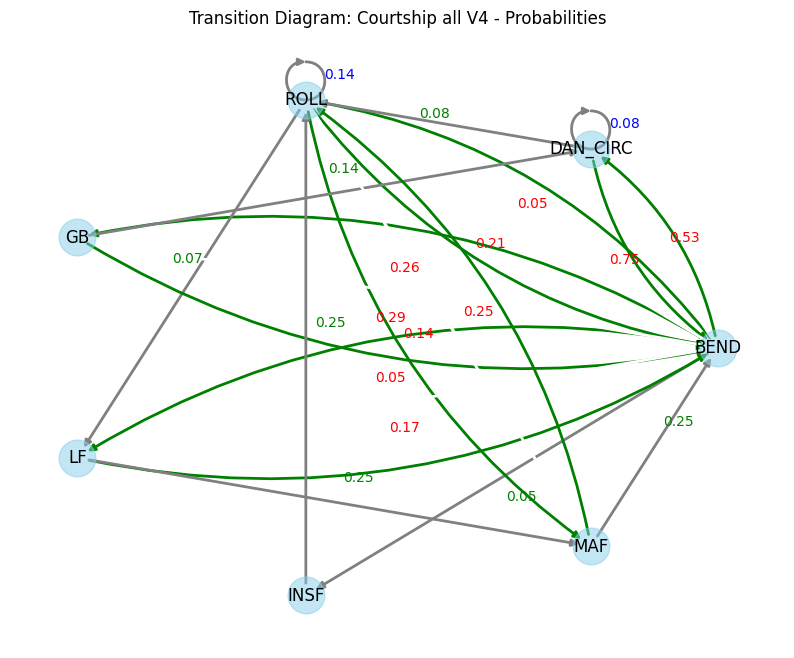

In [ ]:
# Creazione del grafo diretto
G_filtered = nx.DiGraph()

# Aggiunta di nodi e archi al grafo
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
# Definizione del layout del grafo
pos = nx.circular_layout(G_filtered)

plt.figure(figsize=(10, 8))

# Disegno dei nodi
nx.draw_networkx_nodes(G_filtered, pos, node_size=700, node_color='skyblue', alpha=0.5)

# Disegno degli archi con stili personalizzati per evitare sovrapposizioni
for u, v, d in G_filtered.edges(data=True):
    if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale (escludendo autoanelli)
        # Disegno dell'arco u -> v
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='green',
                               connectionstyle='arc3,rad=0.2')  # Arco curvo
        # Disegno dell'arco v -> u senza punta di freccia
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],
                               width=2, arrows=False, edge_color='white',    #toglie la linea in mezzo
                               connectionstyle='arc3,rad=-0.2')  # Arco curvo opposto senza punta di freccia
    else:
        # Disegno dell'arco unidirezionale
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='gray')

# Disegno delle etichette (nodi e archi)
nx.draw_networkx_labels(G_filtered, pos, font_size=12, font_color='black', font_family='sans-serif')

# Creazione delle etichette degli archi
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G_filtered.edges(data=True)}

# Personalizzazione delle etichette degli archi
# Personalizzazione delle etichette degli archi
for (u, v), label in edge_labels.items():
    if u == v:  # Controllo per autoanello
        x, y = pos[u]
        plt.text(x + 0.1, y + 0.1, label, color='blue', ha='center', va='center')  # Regolazione posizione etichetta
    else:
        if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale
            # Etichetta per l'arco curvo u -> v
            x, y = (pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2
            dx, dy = pos[v][0] - pos[u][0], pos[v][1] - pos[u][1]
            angle = np.arctan2(dy, dx)
            angle = np.degrees(angle)
            plt.text(x + 0.1 * np.sin(np.radians(angle)), y - 0.1 * np.cos(np.radians(angle)),
                     label, color='red', ha='center', va='center')
        else:
            # Etichetta per l'arco unidirezionale
            plt.text((pos[u][0] + pos[v][0] + 0.1) / 2 + 0.1 * np.sin(np.radians(angle)), (pos[u][1] + pos[v][1]) / 2 +0.1 * np.cos(np.radians(angle)),
                     label, color='green', ha='center', va='center')

# Titolo e visualizzazione del grafo
plt.title('Transition Diagram: Courtship all V4 - Probabilities')
plt.axis('off')  # Disattiva gli assi

#Save image
#plt.savefig(projectPath_save + '02Courtship_allV4.png')
#plt.savefig(projectPath_save + '02Courtship_allV4.pdf')
#plt.savefig(projectPath_save + '02Courtship_allV4.svg')

# Mostra il grafico
plt.show()


In [ ]:
#Courtship_few = ['BEND', 'DAN_CIRC', 'ROLL', 'GB', 'H_DOWN', 'LF']
Courtship_first = ['ROLL', 'INSF', 'NIP_CORE', 'BEND', 'LF']

In [ ]:
# Filtra la matrice di transizione per i comportamenti di interesse
filtered_transition_matrix_normalizedBI = transition_matrix_normalized.loc[Courtship_first, Courtship_first]

# Visualizza la matrice filtrata
print(filtered_transition_matrix_normalizedBI)


              ROLL      INSF  NIP_CORE      BEND        LF
ROLL      0.142857  0.000000  0.000000  0.214286  0.071429
INSF      0.250000  0.000000  0.250000  0.000000  0.000000
NIP_CORE  0.181818  0.272727  0.000000  0.000000  0.181818
BEND      0.052632  0.052632  0.000000  0.000000  0.052632
LF        0.000000  0.000000  0.083333  0.166667  0.000000


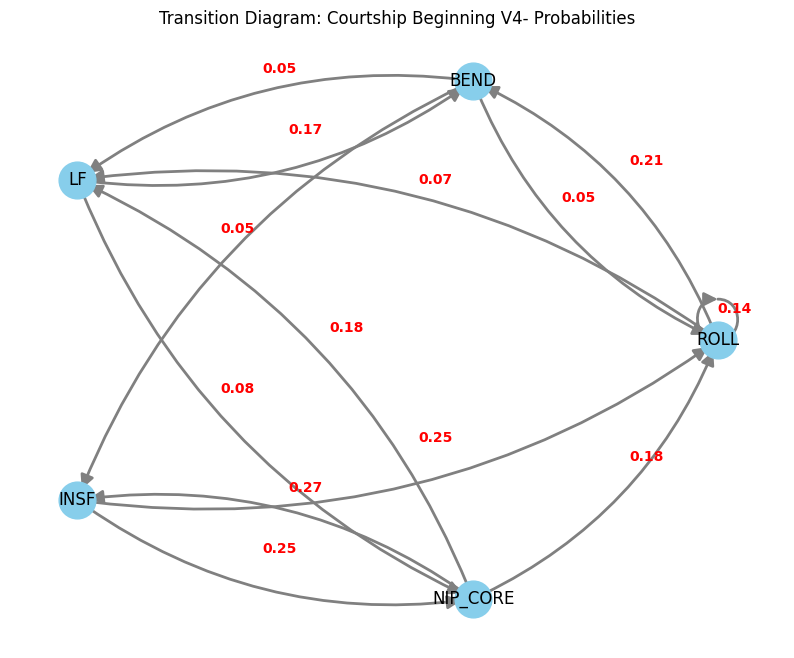

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Creazione del grafo diretto per la matrice filtrata e normalizzata
G_filtered = nx.DiGraph()

# Aggiunta degli archi al grafo con le probabilità come peso
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
pos_filtered = nx.circular_layout(G_filtered)

# Creazione del grafico
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Disegna archi con stile a curve e frecce monodirezionali
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modifica la posizione per disegnare archi curvi
    rad = 0.2 if u != v else 0.0  # rad=0.2 per curve, rad=0 per self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Aggiunta delle etichette ai nodi
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Aggiunta delle etichette agli archi con la probabilità di transizione vicino agli archi
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    # Calcola la posizione media tra i nodi di partenza e di arrivo
    x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2
    y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2 +0.1
    # Applica un piccolo spostamento per evitare sovrapposizioni con le frecce
    offset = 0.1
    x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
    y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Titolo del grafico
plt.title('Transition Diagram: Courtship Beginning V4- Probabilities')
plt.axis('off')  # Disattiva gli assi

#Save image
#plt.savefig(projectPath_save + '01Courtship_beginV4.png')
#plt.savefig(projectPath_save + '01Courtship_beginV4.pdf')
#plt.savefig(projectPath_save + '01Courtship_beginV4.svg')

# Mostra il grafico
plt.show()

<ipython-input-29-154ece860ad0>:31: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],


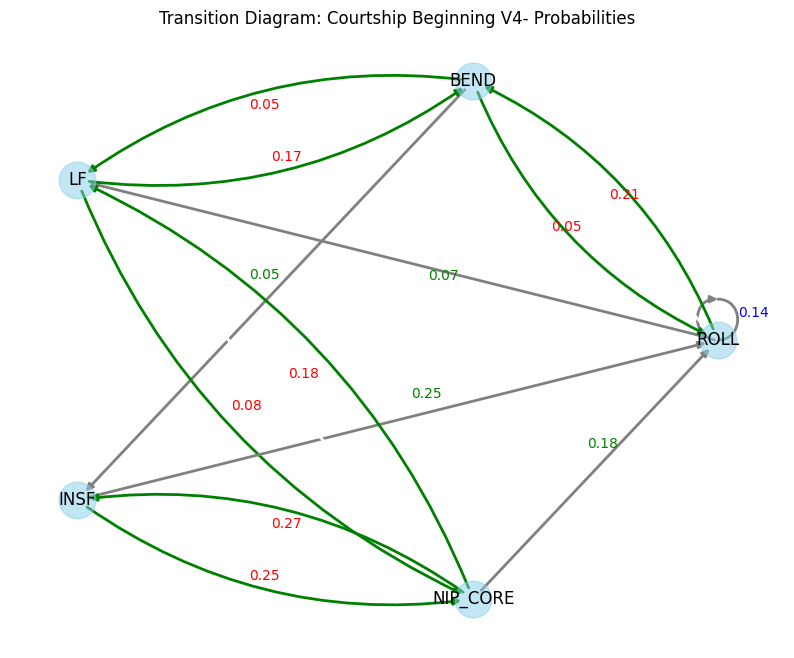

In [ ]:
import networkx as nx

# Creazione del grafo diretto
G_filtered = nx.DiGraph()

# Aggiunta di nodi e archi al grafo
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
# Definizione del layout del grafo
pos = nx.circular_layout(G_filtered)

plt.figure(figsize=(10, 8))

# Disegno dei nodi
nx.draw_networkx_nodes(G_filtered, pos, node_size=700, node_color='skyblue', alpha=0.5)

# Disegno degli archi con stili personalizzati per evitare sovrapposizioni
for u, v, d in G_filtered.edges(data=True):
    if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale (escludendo autoanelli)
        # Disegno dell'arco u -> v
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='green',
                               connectionstyle='arc3,rad=0.2')  # Arco curvo
        # Disegno dell'arco v -> u senza punta di freccia
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],
                               width=2, arrows=False, edge_color='white',    #toglie la linea in mezzo
                               connectionstyle='arc3,rad=-0.2')  # Arco curvo opposto senza punta di freccia
    else:
        # Disegno dell'arco unidirezionale
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='gray')

# Disegno delle etichette (nodi e archi)
nx.draw_networkx_labels(G_filtered, pos, font_size=12, font_color='black', font_family='sans-serif')

# Creazione delle etichette degli archi
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G_filtered.edges(data=True)}

# Personalizzazione delle etichette degli archi
for (u, v), label in edge_labels.items():
    if u == v:  # Controllo per autoanello
        x, y = pos[u]
        plt.text(x + 0.1, y + 0.1, label, color='blue', ha='center', va='center')  # Regolazione posizione etichetta
    else:
        if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale
            # Etichetta per l'arco curvo u -> v
            x, y = (pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2
            dx, dy = pos[v][0] - pos[u][0], pos[v][1] - pos[u][1]
            angle = np.arctan2(dy, dx)
            angle = np.degrees(angle)
            plt.text(x + 0.1 * np.sin(np.radians(angle)), y - 0.1 * np.cos(np.radians(angle)),
                     label, color='red', ha='center', va='center')
        else:
            # Etichetta per l'arco unidirezionale
            plt.text((pos[u][0] + pos[v][0] + 0.1) / 2 + 0.1 * np.sin(np.radians(angle)), (pos[u][1] + pos[v][1]) / 2 +0.1 * np.cos(np.radians(angle)),
                     label, color='green', ha='center', va='center')

# Titolo e visualizzazione del grafo

plt.title('Transition Diagram: Courtship Beginning V4- Probabilities')
plt.axis('off')  # Disattiva gli assi

#Save image
#plt.savefig(projectPath_save + '02Courtship_beginV4.png')
#plt.savefig(projectPath_save + '02Courtship_beginV4.pdf')
#plt.savefig(projectPath_save + '02Courtship_beginV4.svg')

# Mostra il grafico
plt.show()


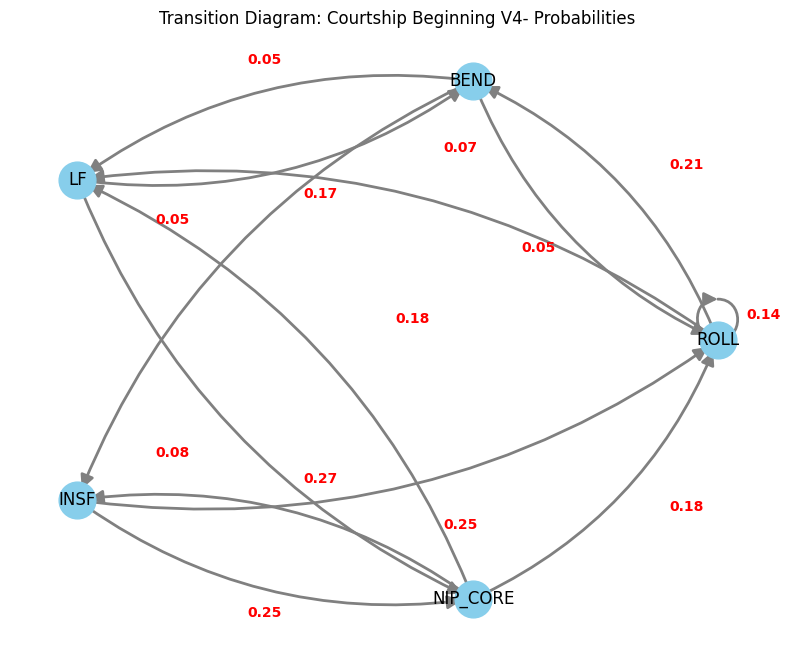

In [ ]:
# Creazione del grafo diretto per la matrice filtrata e normalizzata
G_filtered = nx.DiGraph()

# Aggiunta degli archi al grafo con le probabilità come peso
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
pos_filtered = nx.circular_layout(G_filtered)

# Creazione del grafico
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Disegna archi con stile a curve e frecce monodirezionali
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modifica la posizione per disegnare archi curvi
    rad = 0.2 if u != v else 0.0  # rad=0.2 per curve, rad=0 per self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Aggiunta delle etichette ai nodi
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Aggiunta delle etichette agli archi con la probabilità di transizione vicino agli archi
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    if u == v:
        # Se è un autoanello, posiziona l'etichetta leggermente sopra il nodo
        x_pos = pos_filtered[u][0] + 0.08
        y_pos = pos_filtered[u][1] + 0.08
    else:
        # Calcola la posizione media tra i nodi di partenza e di arrivo
        x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2
        y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2
        # Applica un offset maggiore per evitare sovrapposizioni con le frecce
        offset = 0.22
        x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
        y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])

    # Aggiungi l'etichetta al grafico
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Titolo del grafico
# Titolo del grafico
plt.title('Transition Diagram: Courtship Beginning V4- Probabilities')
plt.axis('off')  # Disattiva gli assi

#Save image
#plt.savefig(projectPath_save + '03Courtship_beginV4.png')
#plt.savefig(projectPath_save + '03Courtship_beginV4.pdf')
#plt.savefig(projectPath_save + '03Courtship_beginV4.svg')

# Mostra il grafico
plt.show()

**Nest_mantainance:**

In [ ]:
#removing "['SA', 'NIP_OUT', 'BN', 'AM', 'LAND', 'MAN'] not in index"
Nest_mantainance = ['NIP_IN', 'BN', 'AM', 'MAN', 'NIP_CORE', 'INS' ]

In [ ]:
# Filtra la matrice di transizione per i comportamenti di interesse
filtered_transition_matrix_normalizedBI = transition_matrix_normalized.loc[Nest_mantainance, Nest_mantainance]

# Visualizza la matrice filtrata
print(filtered_transition_matrix_normalizedBI)


            NIP_IN   BN        AM       MAN  NIP_CORE       INS
NIP_IN    0.111111  0.0  0.000000  0.111111  0.555556  0.000000
BN        0.250000  0.0  0.000000  0.000000  0.000000  0.250000
AM        1.000000  0.0  0.000000  0.000000  0.000000  0.000000
MAN       0.333333  0.0  0.000000  0.000000  0.333333  0.000000
NIP_CORE  0.000000  0.0  0.090909  0.000000  0.000000  0.090909
INS       0.000000  0.0  0.000000  0.500000  0.000000  0.000000


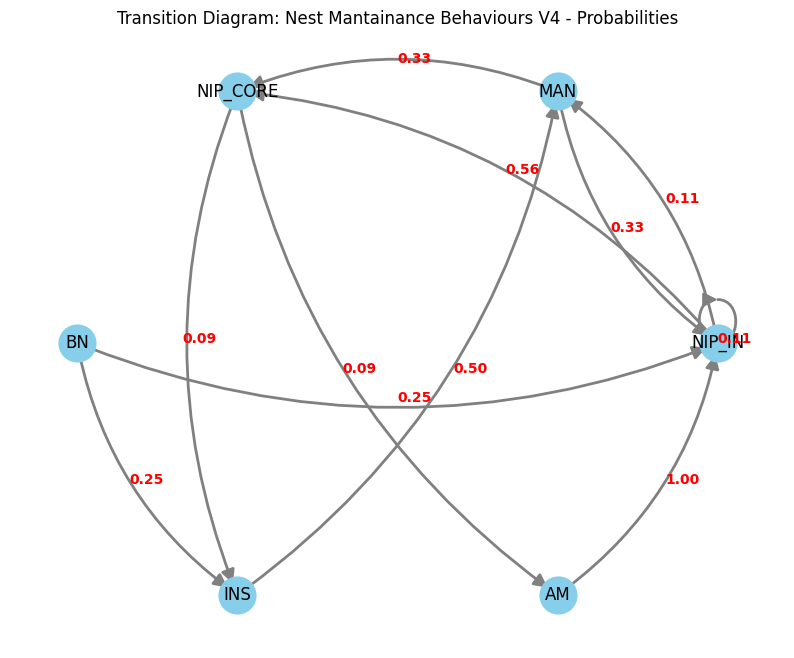

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Supponiamo di avere già la matrice di transizione normalizzata filtrata
# filtered_transition_matrix_normalized

# Creazione del grafo diretto per la matrice filtrata e normalizzata
G_filtered = nx.DiGraph()

# Aggiunta degli archi al grafo con le probabilità come peso
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
pos_filtered = nx.circular_layout(G_filtered)

# Creazione del grafico
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Disegna archi con stile a curve e frecce monodirezionali
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modifica la posizione per disegnare archi curvi
    rad = 0.2 if u != v else 0.0  # rad=0.2 per curve, rad=0 per self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Aggiunta delle etichette ai nodi
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Aggiunta delle etichette agli archi con la probabilità di transizione vicino agli archi
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    # Calcola la posizione media tra i nodi di partenza e di arrivo
    x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2
    y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2
    # Applica un piccolo spostamento per evitare sovrapposizioni con le frecce
    offset = 0.1
    x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
    y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Titolo del grafico
plt.title('Transition Diagram: Nest Mantainance Behaviours V4 - Probabilities')
plt.axis('off')  # Disattiva gli assi

#save
#plt.savefig(projectPath_save + '01Nest_mantainanceV4.png')
#plt.savefig(projectPath_save + '01Nest_mantainanceV4.pdf')
#plt.savefig(projectPath_save + '01Nest_mantainanceV4.svg')

# Mostra il grafico
plt.show()


<ipython-input-34-8b7a5513b545>:31: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],


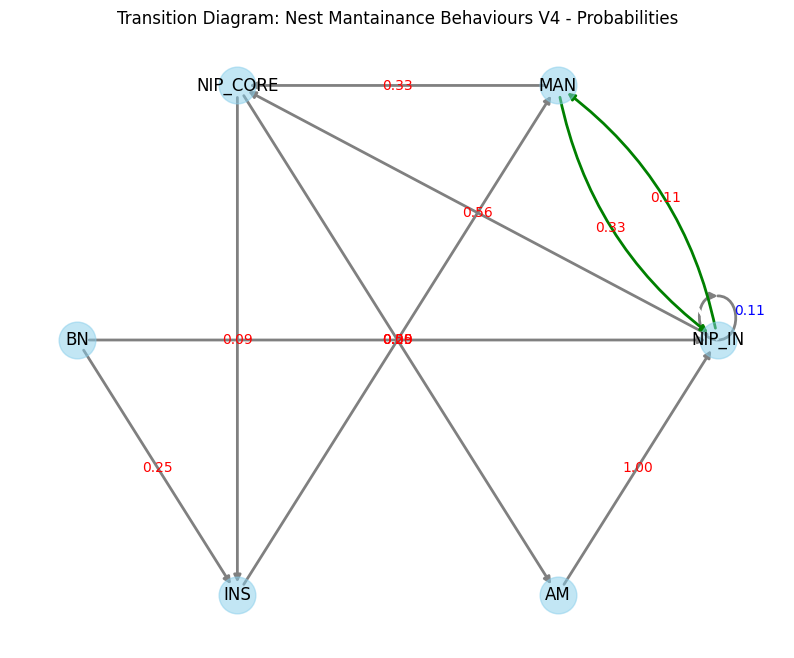

In [ ]:
import networkx as nx

# Creazione del grafo diretto
G_filtered = nx.DiGraph()

# Aggiunta di nodi e archi al grafo
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
# Definizione del layout del grafo
pos = nx.circular_layout(G_filtered)

plt.figure(figsize=(10, 8))

# Disegno dei nodi
nx.draw_networkx_nodes(G_filtered, pos, node_size=700, node_color='skyblue', alpha=0.5)

# Disegno degli archi con stili personalizzati per evitare sovrapposizioni
for u, v, d in G_filtered.edges(data=True):
    if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale (escludendo autoanelli)
        # Disegno dell'arco u -> v
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='green',
                               connectionstyle='arc3,rad=0.2')  # Arco curvo
        # Disegno dell'arco v -> u senza punta di freccia
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],
                               width=2, arrows=False, edge_color='white',    #toglie la linea in mezzo
                               connectionstyle='arc3,rad=-0.2')  # Arco curvo opposto senza punta di freccia
    else:
        # Disegno dell'arco unidirezionale
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='gray')

# Disegno delle etichette (nodi e archi)
nx.draw_networkx_labels(G_filtered, pos, font_size=12, font_color='black', font_family='sans-serif')

# Creazione delle etichette degli archi
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G_filtered.edges(data=True)}

# Personalizzazione delle etichette degli archi
for (u, v), label in edge_labels.items():
    if u == v:  # Controllo per autoanello
        x, y = pos[u]
        plt.text(x + 0.1, y + 0.1, label, color='blue', ha='center', va='center')  # Regolazione posizione etichetta
    else:
        if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale
            # Etichetta per l'arco curvo u -> v
            x, y = (pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2
            dx, dy = pos[v][0] - pos[u][0], pos[v][1] - pos[u][1]
            angle = np.arctan2(dy, dx)
            angle = np.degrees(angle)
            plt.text(x + 0.1 * np.sin(np.radians(angle)), y - 0.1 * np.cos(np.radians(angle)),
                     label, color='red', ha='center', va='center')
        else:
            # Etichetta per l'arco unidirezionale
            plt.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2,
                     label, color='red', ha='center', va='center')


# Titolo del grafico
plt.title('Transition Diagram: Nest Mantainance Behaviours V4 - Probabilities')
plt.axis('off')  # Disattiva gli assi

#save
#plt.savefig(projectPath_save + '02Nest_mantainanceV4.png')
#plt.savefig(projectPath_save + '02Nest_mantainanceV4.pdf')
#plt.savefig(projectPath_save + '02Nest_mantainanceV4.svg')

# Mostra il grafico
plt.show()




In [ ]:
Nest_mantainanceRID = ['NIP_IN', 'AM', 'NIP_CORE' ]

In [ ]:
# Filtra la matrice di transizione per i comportamenti di interesse
filtered_transition_matrix_normalizedBI = transition_matrix_normalized.loc[Nest_mantainanceRID, Nest_mantainanceRID]

# Visualizza la matrice filtrata
print(filtered_transition_matrix_normalizedBI)


            NIP_IN        AM  NIP_CORE
NIP_IN    0.111111  0.000000  0.555556
AM        1.000000  0.000000  0.000000
NIP_CORE  0.000000  0.090909  0.000000


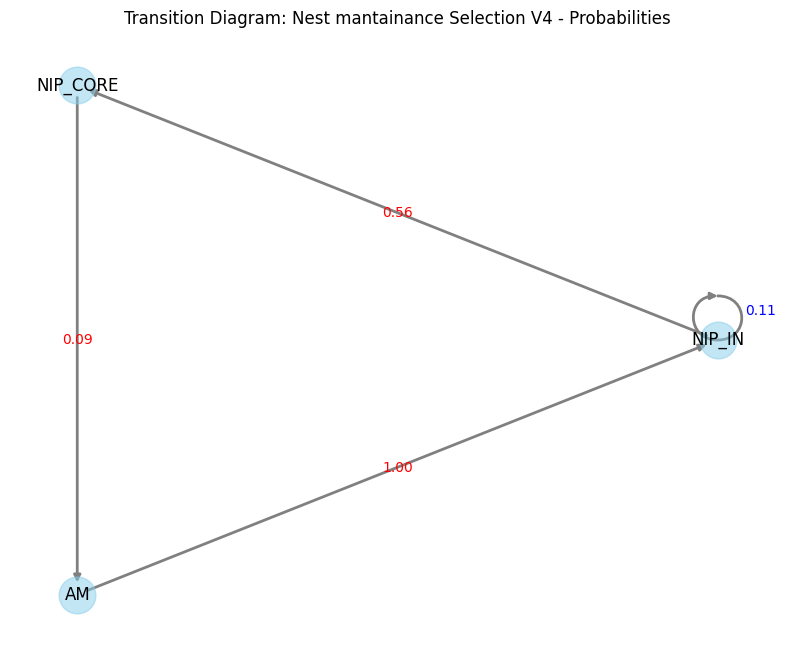

In [ ]:
import networkx as nx

# Creazione del grafo diretto
G_filtered = nx.DiGraph()

# Aggiunta di nodi e archi al grafo
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
# Definizione del layout del grafo
pos = nx.circular_layout(G_filtered)

plt.figure(figsize=(10, 8))

# Disegno dei nodi
nx.draw_networkx_nodes(G_filtered, pos, node_size=700, node_color='skyblue', alpha=0.5)

# Disegno degli archi con stili personalizzati per evitare sovrapposizioni
for u, v, d in G_filtered.edges(data=True):
    if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale (escludendo autoanelli)
        # Disegno dell'arco u -> v
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='green',
                               connectionstyle='arc3,rad=0.2')  # Arco curvo
        # Disegno dell'arco v -> u senza punta di freccia
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],
                               width=2, arrows=False, edge_color='white',    #toglie la linea in mezzo
                               connectionstyle='arc3,rad=-0.2')  # Arco curvo opposto senza punta di freccia
    else:
        # Disegno dell'arco unidirezionale
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='gray')

# Disegno delle etichette (nodi e archi)
nx.draw_networkx_labels(G_filtered, pos, font_size=12, font_color='black', font_family='sans-serif')

# Creazione delle etichette degli archi
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G_filtered.edges(data=True)}

# Personalizzazione delle etichette degli archi
for (u, v), label in edge_labels.items():
    if u == v:  # Controllo per autoanello
        x, y = pos[u]
        plt.text(x + 0.1, y + 0.1, label, color='blue', ha='center', va='center')  # Regolazione posizione etichetta
    else:
        if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale
            # Etichetta per l'arco curvo u -> v
            x, y = (pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2
            dx, dy = pos[v][0] - pos[u][0], pos[v][1] - pos[u][1]
            angle = np.arctan2(dy, dx)
            angle = np.degrees(angle)
            plt.text(x + 0.1 * np.sin(np.radians(angle)), y - 0.1 * np.cos(np.radians(angle)),
                     label, color='red', ha='center', va='center')
        else:
            # Etichetta per l'arco unidirezionale
            plt.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2,
                     label, color='red', ha='center', va='center')

# Titolo e visualizzazione del grafo
plt.title('Transition Diagram: Nest mantainance Selection V4 - Probabilities')
plt.axis('off')  # Disattiva gli assi

#save
#plt.savefig(projectPath_save + '01Nest_mantainanceSelV4.png')
#plt.savefig(projectPath_save + '01Nest_mantainanceSelV4.pdf')
#plt.savefig(projectPath_save + '01Nest_mantainanceSelV4.svg')

# Mostra il grafico
plt.show()


**Egg_care**

In [ ]:
#removing "['FAN', 'INS'] not in index"
Egg_care = ['INSF', 'NIP_CORE', 'INS', 'FAN']

In [ ]:
# Filtra la matrice di transizione per i comportamenti di interesse
filtered_transition_matrix_normalizedBI = transition_matrix_normalized.loc[Egg_care, Egg_care]

# Visualizza la matrice filtrata
print(filtered_transition_matrix_normalizedBI)


              INSF  NIP_CORE       INS       FAN
INSF      0.000000  0.250000  0.000000  0.500000
NIP_CORE  0.272727  0.000000  0.090909  0.090909
INS       0.000000  0.000000  0.000000  0.500000
FAN       0.000000  0.133333  0.000000  0.000000


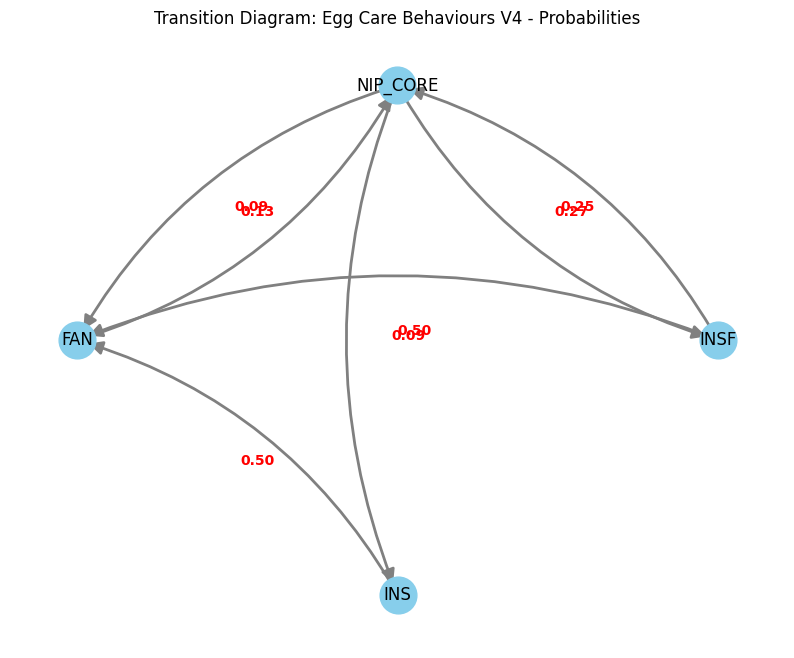

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Creazione del grafo diretto per la matrice filtrata e normalizzata
G_filtered = nx.DiGraph()

# Aggiunta degli archi al grafo con le probabilità come peso
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
pos_filtered = nx.circular_layout(G_filtered)

# Creazione del grafico
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Disegna archi con stile a curve e frecce monodirezionali
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modifica la posizione per disegnare archi curvi
    rad = 0.2 if u != v else 0.0  # rad=0.2 per curve, rad=0 per self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Aggiunta delle etichette ai nodi
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Aggiunta delle etichette agli archi con la probabilità di transizione vicino agli archi
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    # Calcola la posizione media tra i nodi di partenza e di arrivo
    x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2
    y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2
    # Applica un piccolo spostamento per evitare sovrapposizioni con le frecce
    offset = 0.01
    x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
    y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Titolo del grafico
plt.title('Transition Diagram: Egg Care Behaviours V4 - Probabilities')
plt.axis('off')  # Disattiva gli assi

#save
#plt.savefig(projectPath_save + '01Egg_careV4.png')
#plt.savefig(projectPath_save + '01Egg_careV4.pdf')
#plt.savefig(projectPath_save + '01Egg_careV4.svg')

# Mostra il grafico
plt.show()

<ipython-input-41-2d72de7e6cb2>:31: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],


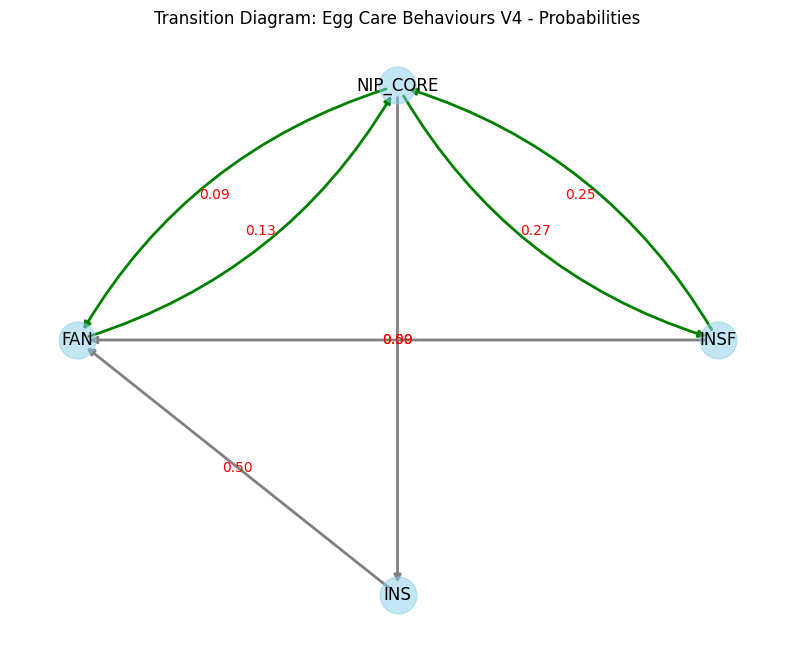

In [ ]:
import networkx as nx

# Creazione del grafo diretto
G_filtered = nx.DiGraph()

# Aggiunta di nodi e archi al grafo
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
# Definizione del layout del grafo
pos = nx.circular_layout(G_filtered)

plt.figure(figsize=(10, 8))

# Disegno dei nodi
nx.draw_networkx_nodes(G_filtered, pos, node_size=700, node_color='skyblue', alpha=0.5)

# Disegno degli archi con stili personalizzati per evitare sovrapposizioni
for u, v, d in G_filtered.edges(data=True):
    if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale (escludendo autoanelli)
        # Disegno dell'arco u -> v
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='green',
                               connectionstyle='arc3,rad=0.2')  # Arco curvo
        # Disegno dell'arco v -> u senza punta di freccia
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],
                               width=2, arrows=False, edge_color='white',    #toglie la linea in mezzo
                               connectionstyle='arc3,rad=-0.2')  # Arco curvo opposto senza punta di freccia
    else:
        # Disegno dell'arco unidirezionale
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='gray')

# Disegno delle etichette (nodi e archi)
nx.draw_networkx_labels(G_filtered, pos, font_size=12, font_color='black', font_family='sans-serif')

# Creazione delle etichette degli archi
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G_filtered.edges(data=True)}

# Personalizzazione delle etichette degli archi
for (u, v), label in edge_labels.items():
    if u == v:  # Controllo per autoanello
        x, y = pos[u]
        plt.text(x + 0.1, y + 0.1, label, color='blue', ha='center', va='center')  # Regolazione posizione etichetta
    else:
        if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale
            # Etichetta per l'arco curvo u -> v
            x, y = (pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2
            dx, dy = pos[v][0] - pos[u][0], pos[v][1] - pos[u][1]
            angle = np.arctan2(dy, dx)
            angle = np.degrees(angle)
            plt.text(x + 0.1 * np.sin(np.radians(angle)), y - 0.1 * np.cos(np.radians(angle)),
                     label, color='red', ha='center', va='center')
        else:
            # Etichetta per l'arco unidirezionale
            plt.text((pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2,
                     label, color='red', ha='center', va='center')

# Titolo e visualizzazione del grafo
plt.title('Transition Diagram: Egg Care Behaviours V4 - Probabilities')
plt.axis('off')  # Disattiva gli assi

#save
#plt.savefig(projectPath_save + '02Egg_careV4.png')
#plt.savefig(projectPath_save + '02Egg_careV4.pdf')
#plt.savefig(projectPath_save + '02Egg_careV4.svg')

# Mostra il grafico
plt.show()



**Agonism**

In [ ]:
Agonism = ['LF', 'CHASE_FLEE', 'BN']

In [ ]:
# Filtra la matrice di transizione per i comportamenti di interesse
filtered_transition_matrix_normalizedBI = transition_matrix_normalized.loc[Agonism, Agonism]

# Visualizza la matrice filtrata
print(filtered_transition_matrix_normalizedBI)


             LF  CHASE_FLEE   BN
LF          0.0    0.083333  0.0
CHASE_FLEE  0.0    0.000000  1.0
BN          0.0    0.000000  0.0


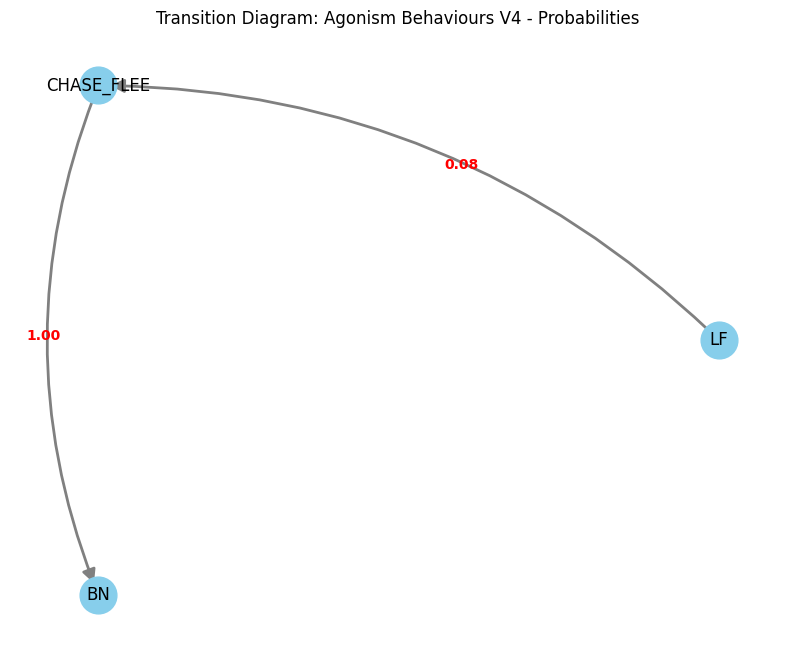

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Supponiamo di avere già la matrice di transizione normalizzata filtrata
# filtered_transition_matrix_normalized

# Creazione del grafo diretto per la matrice filtrata e normalizzata
G_filtered = nx.DiGraph()

# Aggiunta degli archi al grafo con le probabilità come peso
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
pos_filtered = nx.circular_layout(G_filtered)

# Creazione del grafico
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Disegna archi con stile a curve e frecce monodirezionali
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modifica la posizione per disegnare archi curvi
    rad = 0.2 if u != v else 0.0  # rad=0.2 per curve, rad=0 per self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Aggiunta delle etichette ai nodi
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Aggiunta delle etichette agli archi con la probabilità di transizione vicino agli archi
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    # Calcola la posizione media tra i nodi di partenza e di arrivo
    x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2
    y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2
    # Applica un piccolo spostamento per evitare sovrapposizioni con le frecce
    offset = 0.1
    x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
    y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Titolo del grafico
plt.title('Transition Diagram: Agonism Behaviours V4 - Probabilities')
plt.axis('off')  # Disattiva gli assi
#save
#plt.savefig(projectPath_save + '01AgonismV4.png')
#plt.savefig(projectPath_save + '01AgonismV4.pdf')
#plt.savefig(projectPath_save + '01AgonismV4.svg')

# Mostra il grafico
plt.show()


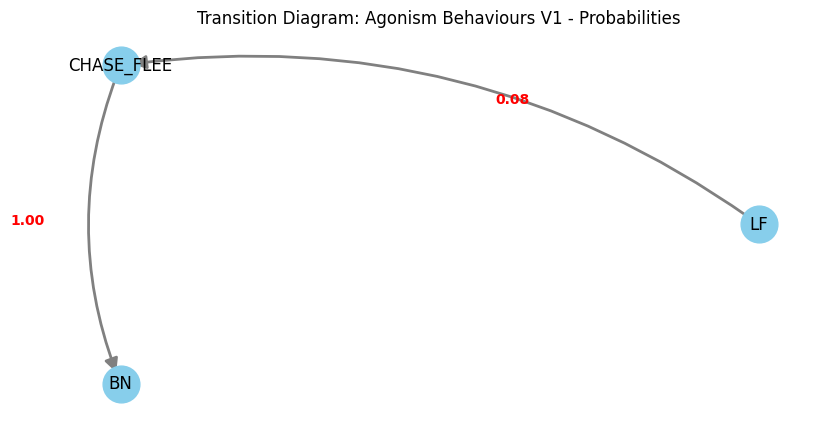

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Supponiamo di avere già la matrice di transizione normalizzata filtrata
# filtered_transition_matrix_normalized

# Creazione del grafo diretto per la matrice filtrata e normalizzata
G_filtered = nx.DiGraph()

# Aggiunta degli archi al grafo con le probabilità come peso
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
pos_filtered = nx.circular_layout(G_filtered)

# Creazione del grafico
plt.figure(figsize=(10, 5))
nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=700, node_color='skyblue')

# Disegna archi con stile a curve e frecce monodirezionali
for u, v, d in G_filtered.edges(data=True):
    probability = d['weight']
    # Modifica la posizione per disegnare archi curvi
    rad = 0.2 if u != v else 0.0  # rad=0.2 per curve, rad=0 per self-loop
    nx.draw_networkx_edges(G_filtered, pos_filtered, edgelist=[(u, v)], width=2,
                           edge_color='gray', connectionstyle=f'arc3,rad={rad}',
                           arrows=True, arrowstyle='-|>', arrowsize=20)

# Aggiunta delle etichette ai nodi
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=12, font_color='black', font_family='sans-serif')

# Aggiunta delle etichette agli archi con la probabilità di transizione vicino agli archi
for (u, v, d) in G_filtered.edges(data=True):
    probability = f"{d['weight']:.2f}"
    if u == v:
        # Se è un autoanello, posiziona l'etichetta leggermente sopra il nodo
        x_pos = pos_filtered[u][0] + 0.09
        y_pos = pos_filtered[u][1] + 0.09
    else:
        # Calcola la posizione media tra i nodi di partenza e di arrivo
        x_pos = (pos_filtered[u][0] + pos_filtered[v][0]) / 2
        y_pos = (pos_filtered[u][1] + pos_filtered[v][1]) / 2
        # Applica un offset maggiore per evitare sovrapposizioni con le frecce
        offset = 0.15
        x_pos += offset * (pos_filtered[v][1] - pos_filtered[u][1])
        y_pos += offset * (pos_filtered[u][0] - pos_filtered[v][0])

    # Aggiungi l'etichetta al grafico
    plt.text(x_pos, y_pos, probability, color='red', fontweight='bold')

# Titolo del grafico
plt.title('Transition Diagram: Agonism Behaviours V1 - Probabilities')
plt.axis('off')  # Disattiva gli assi
#save
#plt.savefig(projectPath_save + '02AgonismV4.png')
#plt.savefig(projectPath_save + '02AgonismV4.pdf')
#plt.savefig(projectPath_save + '02AgonismV4.svg')

# Mostra il grafico
plt.show()



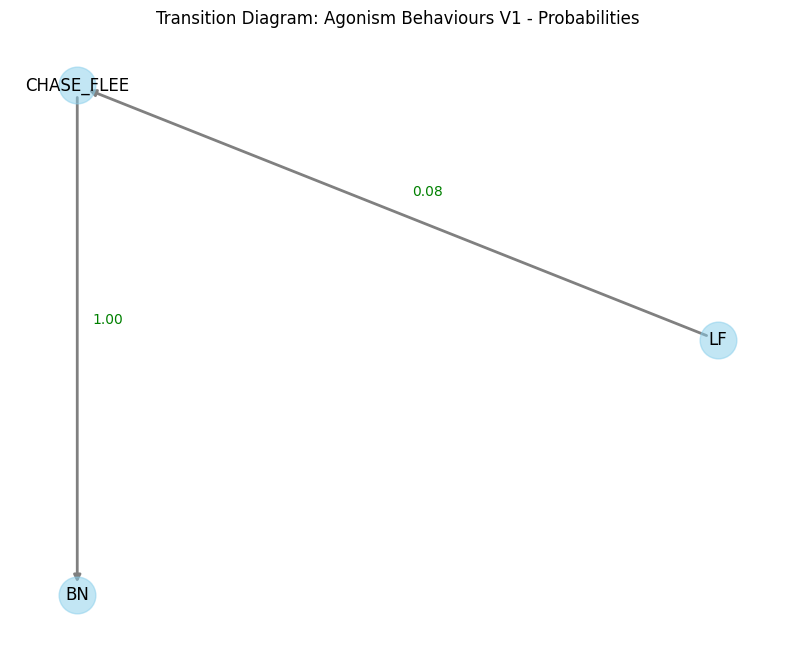

In [ ]:

# Creazione del grafo diretto
G_filtered = nx.DiGraph()

# Aggiunta di nodi e archi al grafo
for from_behavior in filtered_transition_matrix_normalizedBI.index:
    for to_behavior in filtered_transition_matrix_normalizedBI.columns:
        probability = filtered_transition_matrix_normalizedBI.loc[from_behavior, to_behavior]
        if probability > 0:
            # Aggiungi un arco con il peso (probabilità di transizione)
            G_filtered.add_edge(from_behavior, to_behavior, weight=probability)

# Posizionamento circolare dei nodi nel grafico
# Definizione del layout del grafo
pos = nx.circular_layout(G_filtered)

plt.figure(figsize=(10, 8))

# Disegno dei nodi
nx.draw_networkx_nodes(G_filtered, pos, node_size=700, node_color='skyblue', alpha=0.5)

# Disegno degli archi con stili personalizzati per evitare sovrapposizioni
for u, v, d in G_filtered.edges(data=True):
    if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale (escludendo autoanelli)
        # Disegno dell'arco u -> v
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='green',
                               connectionstyle='arc3,rad=0.2')  # Arco curvo
        # Disegno dell'arco v -> u senza punta di freccia
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(v, u)],
                               width=2, arrows=False, edge_color='white',    #toglie la linea in mezzo
                               connectionstyle='arc3,rad=-0.2')  # Arco curvo opposto senza punta di freccia
    else:
        # Disegno dell'arco unidirezionale
        nx.draw_networkx_edges(G_filtered, pos, edgelist=[(u, v)],
                               width=2, arrows=True, edge_color='gray')

# Disegno delle etichette (nodi e archi)
nx.draw_networkx_labels(G_filtered, pos, font_size=12, font_color='black', font_family='sans-serif')

# Creazione delle etichette degli archi
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G_filtered.edges(data=True)}

# Personalizzazione delle etichette degli archi
for (u, v), label in edge_labels.items():
    if u == v:  # Controllo per autoanello
        x, y = pos[u]
        plt.text(x + 0.1, y + 0.1, label, color='blue', ha='center', va='center')  # Regolazione posizione etichetta
    else:
        if G_filtered.has_edge(v, u) and u != v:  # Controllo per arco bidirezionale
            # Etichetta per l'arco curvo u -> v
            x, y = (pos[u][0] + pos[v][0]) / 2, (pos[u][1] + pos[v][1]) / 2
            dx, dy = pos[v][0] - pos[u][0], pos[v][1] - pos[u][1]
            angle = np.arctan2(dy, dx)
            angle = np.degrees(angle)
            plt.text(x + 0.1 * np.sin(np.radians(angle)), y - 0.1 * np.cos(np.radians(angle)),
                     label, color='red', ha='center', va='center')
        else:
            # Etichetta per l'arco unidirezionale
            plt.text((pos[u][0] + pos[v][0]) / 2 + 0.1 * np.sin(np.radians(angle)), (pos[u][1] + pos[v][1]) / 2 +0.1 * np.cos(np.radians(angle)),
                     label, color='green', ha='center', va='center')

# Titolo e visualizzazione del grafo

plt.title('Transition Diagram: Agonism Behaviours V1 - Probabilities')
plt.axis('off')  # Disattiva gli assi

#Save image
#plt.savefig(projectPath_save + '03AgonismV4.png')
#plt.savefig(projectPath_save + '03AgonismV4.pdf')
#plt.savefig(projectPath_save + '03AgonismV4.svg')

# Mostra il grafico
plt.show()